<a href="https://colab.research.google.com/github/geun-hyoung/DataAnalysis_Gangseo-gu/blob/main/correlation_Gangseo_gu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 내부 라이브러리 호출

In [1]:
from google.colab import drive
drive.mount('/content/drive') # Connect to drive

import pandas as pd
import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

Mounted at /content/drive


## 상관관계 분석

In [2]:
open_data_df = pd.read_csv('/content/drive/MyDrive/강서구공모전/강서구_공공_데이터.csv', encoding = 'cp949')

In [3]:
open_data_df

,행정구역,총 인구수,노인 인구수,2021년 장애인_인구,2022년 9월~12월 코로나 확진
0,염창동,41225,7237,1047,5417
1,등촌동,73689,19578,5168,8569
2,화곡동,192151,49180,8055,18515
3,가양동,62015,16721,4872,8238
4,발산동,35765,7643,1490,3916
5,우장산동,43164,9100,1248,4913
6,공항동,30051,6507,1315,3660
7,방화동,87473,24979,5351,8761


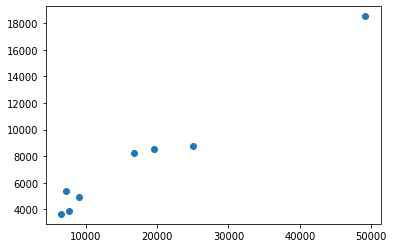

In [4]:
plt.scatter('노인 인구수', '2022년 9월~12월 코로나 확진', data = open_data_df)

In [5]:
open_data_df.iloc[:,1:]

,총 인구수,노인 인구수,2021년 장애인_인구,2022년 9월~12월 코로나 확진
0,41225,7237,1047,5417
1,73689,19578,5168,8569
2,192151,49180,8055,18515
3,62015,16721,4872,8238
4,35765,7643,1490,3916
5,43164,9100,1248,4913
6,30051,6507,1315,3660
7,87473,24979,5351,8761


In [6]:
corr = open_data_df.corr(method = 'pearson')
corr

,총 인구수,노인 인구수,2021년 장애인_인구,2022년 9월~12월 코로나 확진
총 인구수,1.000000,0.993014,0.890780,0.990483
노인 인구수,0.993014,1.000000,0.932081,0.986248
2021년 장애인_인구,0.890780,0.932081,1.000000,0.917657
2022년 9월~12월 코로나 확진,0.990483,0.986248,0.917657,1.000000


/usr/local/lib/python3.9/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.9/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.9/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.9/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.9/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 45432 (\N{HANGUL SYLLABLE NO}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.9/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.9/dist-packages/seaborn/utils.

<Axes: >

/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 45432 (\N{HANGUL SYLLABLE NO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  func(*args, **k

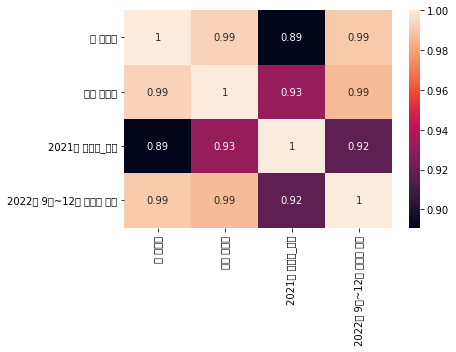

In [7]:
sns.heatmap(corr, annot = True)

In [8]:
cumulative_infected_df = pd.read_csv('/content/drive/MyDrive/강서구공모전/구별_누적_확진자.csv', encoding = 'cp949')
cumulative_infected_df

,자치구,누적 확진자,총 인구수,누적 확진자 비율
0,종로구,79818,72797,1.096446
1,중구,71702,63300,1.132733
2,용산구,122813,109954,1.116949
3,성동구,169866,133819,1.269371
4,광진구,205779,169338,1.215197
5,동대문구,198480,170068,1.167063
6,중랑구,218546,187513,1.165498
7,성북구,253357,197588,1.282249
8,강북구,160711,144577,1.111595
9,도봉구,174164,138541,1.257130


In [9]:
cumulative_infected_df.sort_values('누적 확진자 비율')

,자치구,누적 확진자,총 인구수,누적 확진자 비율
20,관악구,295374,282806,1.044440
0,종로구,79818,72797,1.096446
8,강북구,160711,144577,1.111595
2,용산구,122813,109954,1.116949
17,금천구,135118,119587,1.129872
1,중구,71702,63300,1.132733
6,중랑구,218546,187513,1.165498
5,동대문구,198480,170068,1.167063
4,광진구,205779,169338,1.215197
13,마포구,221669,180085,1.230913
